In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization.array import array_to_latex

In [2]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from dotenv import load_dotenv
import os

load_dotenv()
API_TOKEN = os.environ.get("API_TOKEN")

IBMQ.enable_account(API_TOKEN)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# (a)

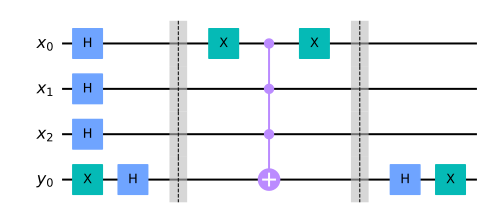

In [3]:
x = QuantumRegister(3, name='x')
y = QuantumRegister(1, name='y')
qc = QuantumCircuit(x, y)

qc.h(x)
qc.x(y)
qc.h(y)

qc.barrier()
qc.x(x[0])
qc.mct(x, y)
qc.x(x[0])
qc.barrier()

qc.h(y)
qc.x(y)

qc.draw()

In [4]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()

array_to_latex(statevector[:8])

<IPython.core.display.Latex object>

In [5]:
array_to_latex(statevector[8:])

<IPython.core.display.Latex object>

## The 6th in 0 ~ 15, i.e. x = 011, y = 0, is negative. Hence, we know the circuit between the barriers does what the job of $U_f$.

# (b)

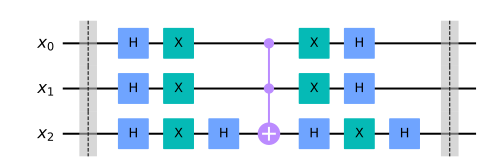

In [6]:
x = QuantumRegister(3, name='x')
qc = QuantumCircuit(x)

qc.barrier()
qc.h(x)
qc.x(x)
qc.h(x[2])
qc.mct(x[:2], x[2])
qc.h(x[2])
qc.x(x)
qc.h(x)
qc.barrier()

qc.draw()

# (c)

## Let's run it $\lfloor \sqrt8 \rfloor = \lfloor 2.8 \rfloor = 2$ times.

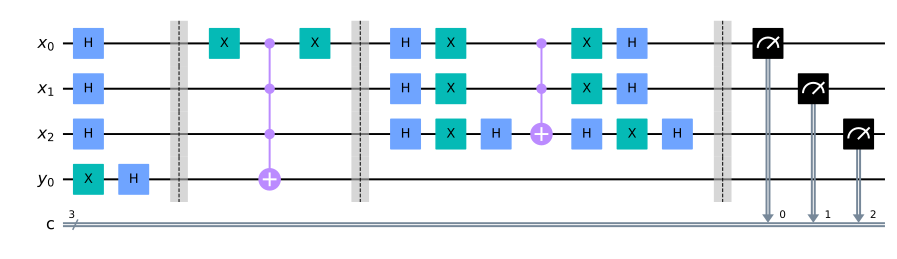

In [7]:
x = QuantumRegister(3, name='x')
y = QuantumRegister(1, name='y')
c = ClassicalRegister(3, name='c')
qc = QuantumCircuit(x, y, c)

qc.h(x)
qc.x(y)
qc.h(y)

qc.barrier()

qc.x(x[0])
qc.mct(x, y)
qc.x(x[0])

qc.barrier()

qc.h(x)
qc.x(x)
qc.h(x[2])
qc.mct(x[:2], x[2])
qc.h(x[2])
qc.x(x)
qc.h(x)

qc.barrier()

qc.measure(x, c)

qc.draw()

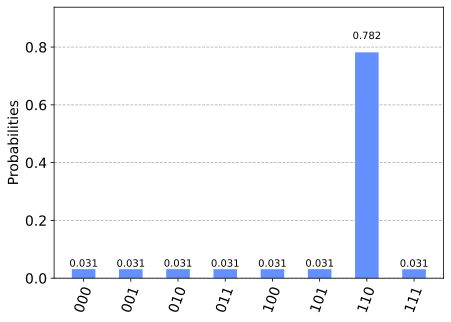

In [8]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

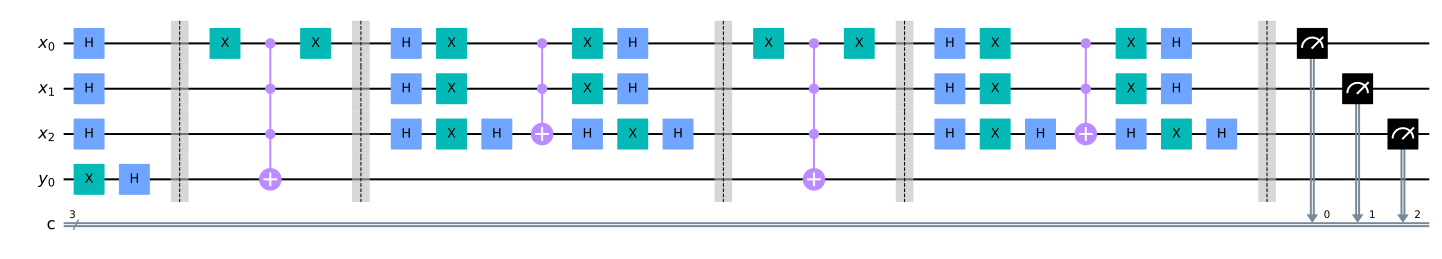

In [9]:
x = QuantumRegister(3, name='x')
y = QuantumRegister(1, name='y')
c = ClassicalRegister(3, name='c')
qc = QuantumCircuit(x, y, c)

qc.h(x)
qc.x(y)
qc.h(y)

qc.barrier()

qc.x(x[0])
qc.mct(x, y)
qc.x(x[0])
qc.barrier()
qc.h(x)
qc.x(x)
qc.h(x[2])
qc.mct(x[:2], x[2])
qc.h(x[2])
qc.x(x)
qc.h(x)

qc.barrier()

qc.x(x[0])
qc.mct(x, y)
qc.x(x[0])
qc.barrier()
qc.h(x)
qc.x(x)
qc.h(x[2])
qc.mct(x[:2], x[2])
qc.h(x[2])
qc.x(x)
qc.h(x)

qc.barrier()

qc.measure(x, c)

qc.draw(fold=-1)

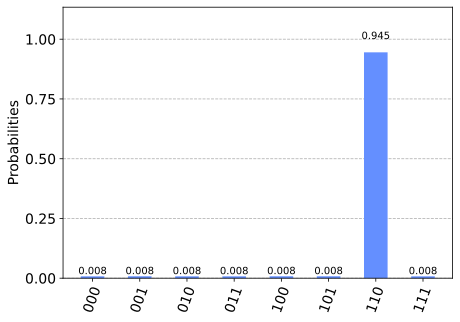

In [10]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [11]:
n = 3
provider = IBMQ.get_provider('ibm-q')
devices = provider.backends(filters=lambda x: x.configuration().n_qubits >= n
                            and not x.configuration().simulator
                            and x.status().operational==True)
backend = least_busy(devices)
print(backend)
job = execute(qc, backend, shots=8192)

ibmq_lima


Job Status: job has successfully run


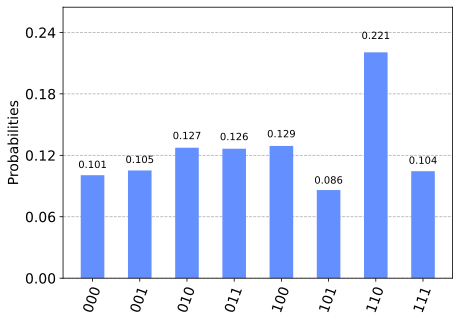

In [12]:
job_monitor(job)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

# (d)

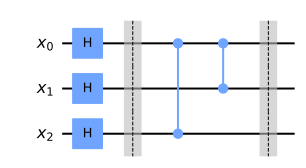

In [13]:
x = QuantumRegister(3, name='x')
qc = QuantumCircuit(x)

qc.h(x)

qc.barrier()
qc.cz(x[0], x[2])
qc.cz(x[0], x[1])
qc.barrier()

qc.draw()

In [14]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()

array_to_latex(statevector)

<IPython.core.display.Latex object>

## The 3rd and 5th in 0 ~ 7, i.e. x = 011 and 101, is negative. Hence, we know the circuit between the barriers does what the job of $U_f$.

# (e)

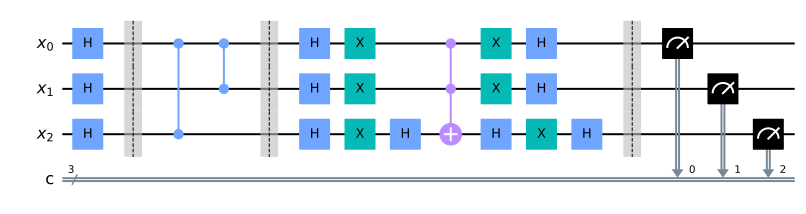

In [15]:
x = QuantumRegister(3, name='x')
c = ClassicalRegister(3, name='c')
qc = QuantumCircuit(x, c)

qc.h(x)

qc.barrier()

qc.cz(x[0], x[2])
qc.cz(x[0], x[1])
qc.barrier()
qc.h(x)
qc.x(x)
qc.h(x[2])
qc.mct(x[:2], x[2])
qc.h(x[2])
qc.x(x)
qc.h(x)

qc.barrier()

qc.measure(x, c)

qc.draw()

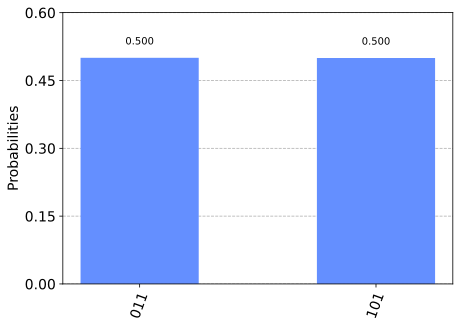

In [16]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## One query is enough!
## Let's try it on the real device.

In [17]:
n = 3
provider = IBMQ.get_provider('ibm-q')
devices = provider.backends(filters=lambda x: x.configuration().n_qubits >= n
                            and not x.configuration().simulator
                            and x.status().operational==True)
backend = least_busy(devices)
print(backend)
job = execute(qc, backend, shots=8192)

ibmq_lima


Job Status: job has successfully run


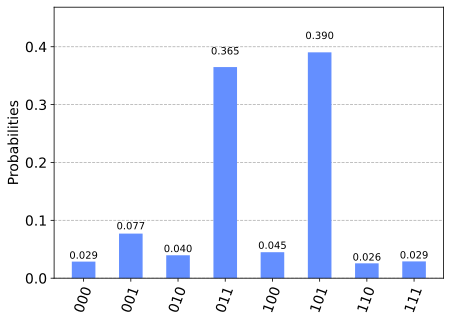

In [18]:
job_monitor(job)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## The result is slightly worse on the real device.

# (f)

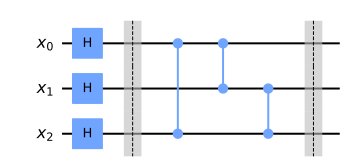

In [19]:
x = QuantumRegister(3, name='x')
qc = QuantumCircuit(x)

qc.h(x)

qc.barrier()
qc.cz(x[0], x[2])
qc.cz(x[0], x[1])
qc.cz(x[1], x[2])
qc.barrier()

qc.draw()

In [20]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()

array_to_latex(statevector)

<IPython.core.display.Latex object>

## The 3rd, 5th, 6th, and 7th in 0 ~ 7, i.e. x = 011, 101, 110, and 111, is negative. Hence, we know the circuit between the barriers does what the job of $U_f$.

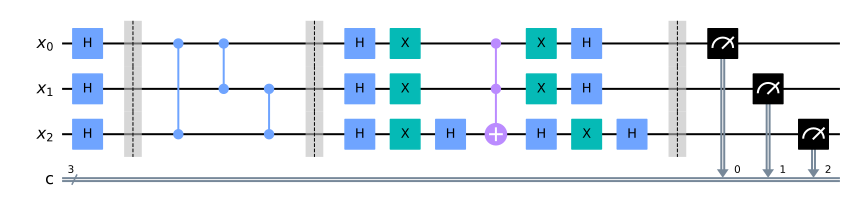

In [21]:
x = QuantumRegister(3, name='x')
c = ClassicalRegister(3, name='c')
qc = QuantumCircuit(x, c)

qc.h(x)

qc.barrier()

qc.cz(x[0], x[2])
qc.cz(x[0], x[1])
qc.cz(x[1], x[2])
qc.barrier()
qc.h(x)
qc.x(x)
qc.h(x[2])
qc.mct(x[:2], x[2])
qc.h(x[2])
qc.x(x)
qc.h(x)

qc.barrier()

qc.measure(x, c)

qc.draw()

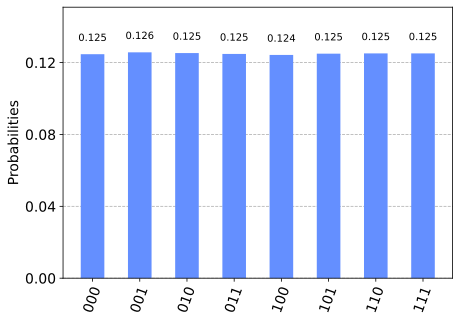

In [22]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## Since half of them are correct answers, the probabilities are all the same.

In [23]:
n = 3
provider = IBMQ.get_provider('ibm-q')
devices = provider.backends(filters=lambda x: x.configuration().n_qubits >= n
                            and not x.configuration().simulator
                            and x.status().operational==True)
backend = least_busy(devices)
print(backend)
job = execute(qc, backend, shots=8192)

ibmq_lima


Job Status: job has successfully run


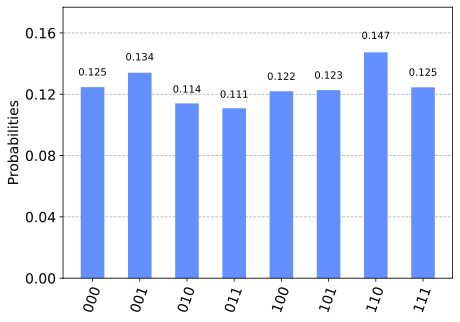

In [24]:
job_monitor(job)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [25]:
IBMQ.disable_account()